# IPL Match Data Analysis

## Objective
To analyze IPL match and ball-by-ball data to understand team performance, toss impact, run trends, and winning patterns using Python.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
matches=pd.read_csv("/kaggle/input/ipl-dataset-2008-2019/IPL 2008-2019/matches.csv")
deliveries=pd.read_csv("/kaggle/input/ipl-dataset-2008-2019/IPL 2008-2019/deliveries.csv")

## Initial Exploration

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Data Cleaning

## 1. Fix date column

In [7]:
matches["date"]=pd.to_datetime(matches["date"], errors="coerce")

## 2. Check missing values

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date               120
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# ANALYSIS QUESTIONS

## Q1. Which teams have won the most matches?

In [9]:
matches["winner"].value_counts().head(10)

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: count, dtype: int64

## Q2. Does winning the toss affect match outcomes?

In [10]:
(matches["toss_winner"]==matches["winner"]).value_counts()

True     393
False    363
Name: count, dtype: int64

In [11]:
(matches["toss_winner"]==matches["winner"]).mean()*100

np.float64(51.98412698412699)

## Q3. Matches played per season?

In [12]:
matches["season"].value_counts().sort_index()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: count, dtype: int64

## Q4. Most popular IPL venues?

In [13]:
matches["venue"].value_counts().head(10)

venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64

## Q5. Total runs scored per season? (Merging)

In [14]:
merged=deliveries.merge(matches,left_on="match_id",right_on="id")
merged.groupby("season")["total_runs"].sum()

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
2018    20706
2019    20270
Name: total_runs, dtype: int64

## Q6. Top batsmen by total runs?

In [15]:
deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

# IPL EDA

## Q1. Matches per Season

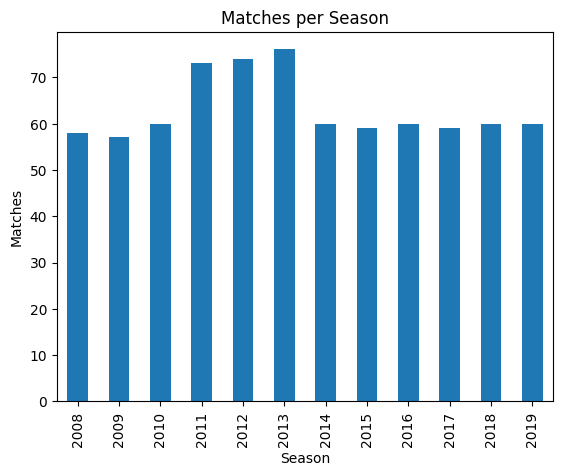

In [16]:
matches['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

### Insight:
Number of matches varies across seasons due to team changes.

## Q2. Top Winning Teams

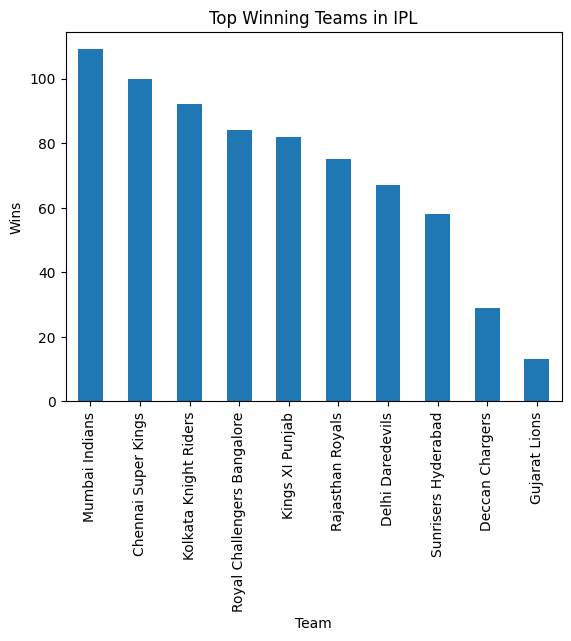

In [17]:
matches['winner'].value_counts().head(10).plot(kind='bar')
plt.title("Top Winning Teams in IPL")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()

### Insight:
MI and CSK are the most successful teams.

## Q3. Toss Decision Preference

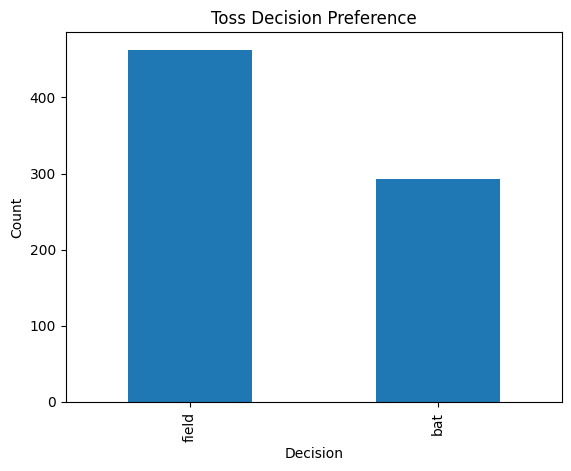

In [18]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title("Toss Decision Preference")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

### Insight:
Teams prefer to field first after winning toss.

## Q4. Toss Winner vs Match Winner

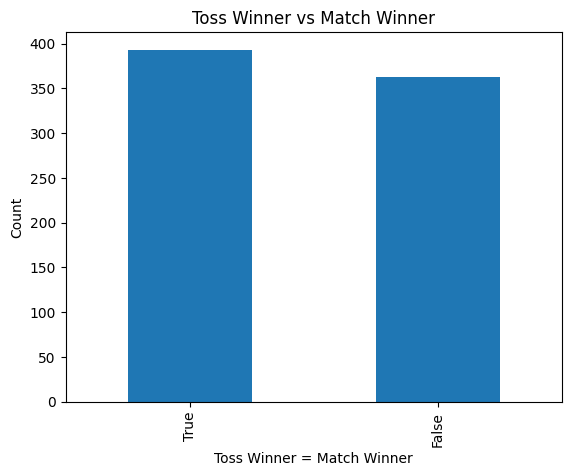

In [19]:
(matches['toss_winner']==matches['winner']).value_counts().plot(kind='bar')
plt.title("Toss Winner vs Match Winner")
plt.xlabel("Toss Winner = Match Winner")
plt.ylabel("Count")
plt.show()

### Insight:
Toss winner does not always win the match.

## Q5. Most Played Venues

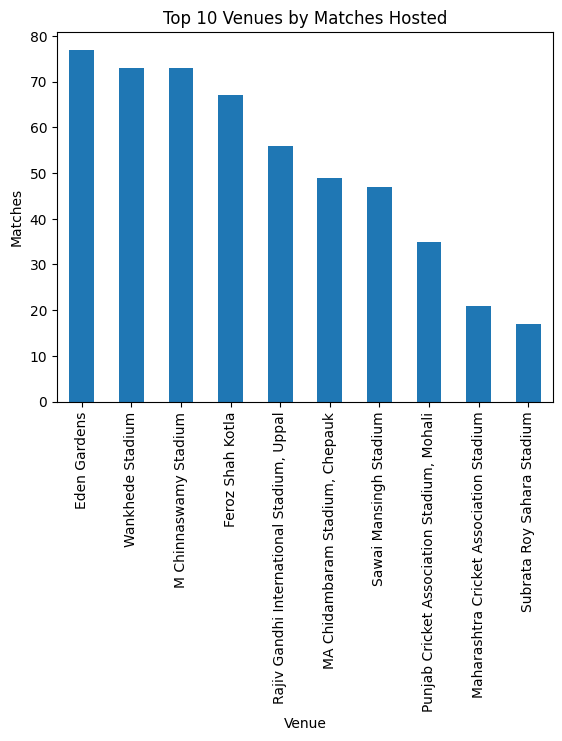

In [20]:
matches['venue'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Venues by Matches Hosted")
plt.xlabel("Venue")
plt.ylabel("Matches")
plt.show()

### Insight:
IPL Matches are mainly hosted in a few popular stadiums.

## Q6. Match Result Types

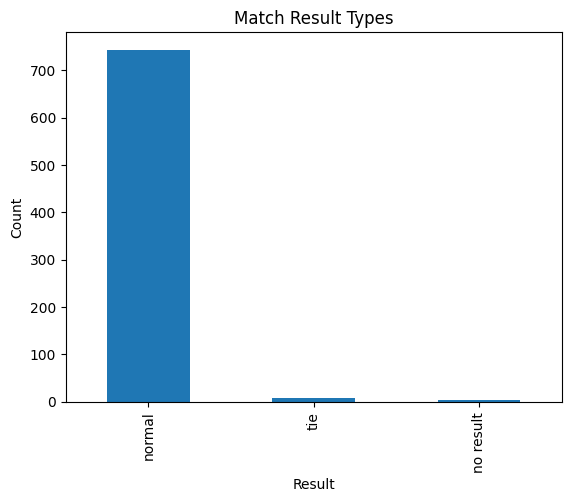

In [21]:
matches['result'].value_counts().plot(kind='bar')
plt.title("Match Result Types")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

### Insight:
Most matches end with a normal result.

## Q7. City-wise Matches

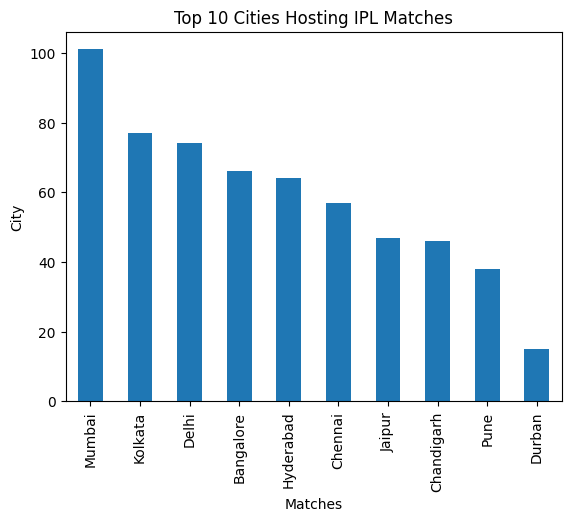

In [22]:
matches['city'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities Hosting IPL Matches")
plt.ylabel("City")
plt.xlabel("Matches")
plt.show()

### Insight:
Matches are concentrated in major Indian cities.

## Key Insights

1. Certain teams have consistently won more matches, showing long-term dominance.
2. Winning the toss provides a slight advantage but does not guarantee victory.
3. The number of matches varies by season, reflecting league expansion.
4. A few venues host the majority of IPL matches.
5. Total runs scored have generally increased over seasons.
6. A small group of batsmen dominate total run scoring in IPL history.